# Feature Engineering

For feature engineering i will be using titanic train dataset. Titanic dataset is very famous and a lot information can be found about it online, including wikis on survivors and the ship itself.

*Starting by importing relevant libraries and loading our data:*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
from pandas_profiling import ProfileReport

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.9 MB 1.0 MB/s 
     |████████████████████████████████| 596 kB 4.2 MB/s 
     |████████████████████████████████| 102 kB 54.2 MB/s 
     |████████████████████████████████| 690 kB 43.5 MB/s 
     |████████████████████████████████| 4.7 MB 40.5 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 812 kB 45.9 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=261257 sha256=ad2bf9b82e973af75cbc80e7a2101276560b2583e4469f28ea1badad46100422
  Stored in directory: /tmp/pip-ephem-wheel-cache-rk6wscux/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=cf30952c8595049f297827d32ef9269484bb275524c58d2c0d8ff227f11b78ec
  Stored in directory: /root/.cache/pip/whee

In [ ]:
# loading data
data = pd.read_csv('/content/train (5).csv')

In [ ]:
#preview
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Pandas profiling is a good way to get a sense of the data, as it does some of the EDA for you

In [ ]:
profile = ProfileReport(data, title="Pandas Profiling Report")
profile
# incase it is not showing copy paste the code on a separate notebook 
#or choose to view in colab

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

DEALING WITH MISSING VALUES

In [ ]:
# checking missing values
data.isnull().sum()

#three columns with missing values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#cabin has very high missing values, will drop column later on
#but we can make new variable cabin group based on the first letter A, B , C etc
#and add a missing group M for EDA. 

#fill missing values in Cabin with M
data['Cabin'] = data['Cabin'].fillna('M')
#Changing dtype to str and creating new col with first letter of str
data['Cabin'] = data['Cabin'].astype(str)
data['CabinGroup'] = data['Cabin'].str[:1]

#checking unique values
data['CabinGroup'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
data['CabinGroup'].value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: CabinGroup, dtype: int64

In [ ]:
# from online search T did not exist,
# G was lowest deck carrying passengers
#changing T to M
data['CabinGroup'] = np.where((data['CabinGroup'] == 'T' ),
                              'M', data['CabinGroup'])

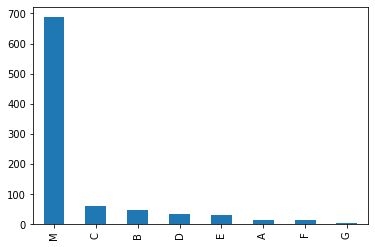

In [ ]:
#visual, too many missing cabin information M
#will further look at how the missing group survival rate in bivariate analysis
cg_count = data['CabinGroup'].value_counts()
cg_count.plot.bar()

In [ ]:
#checking the rows with missing value for embarked column
# same ticket number, cabin , pclass
data[data['Embarked'].isna()]


PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked CabinGroup  
61   female  38.0      0      0  113572  80.0   B28      NaN          B  
829  female  62.0      0      0  113572  80.0   B28      NaN          B

In [ ]:
#checking if another person had same ticket number 
#
data[data['Ticket'] == '113572']
#only the 2 had same ticket number

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked CabinGroup  
61   female  38.0      0      0  113572  80.0   B28      NaN          B  
829  female  62.0      0      0  113572  80.0   B28      NaN          B

In [ ]:
#checking the overall mode of embarked
data['Embarked'].value_counts()
# S is the mode

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
#grouping by survived by pclass
data.groupby(['Pclass','CabinGroup','Sex','Embarked'])['Survived'].describe()
#mode for pclass 1, B Cabin, female is also = S

count      mean       std  min   25%  50%  \
Pclass CabinGroup Sex    Embarked                                              
1      A          female C           1.0  1.000000       NaN  1.0  1.00  1.0   
                  male   C           6.0  0.500000  0.547723  0.0  0.00  0.5   
                         S           8.0  0.375000  0.517549  0.0  0.00  0.0   
       B          female C          12.0  1.000000  0.000000  1.0  1.00  1.0   
                         S          13.0  1.000000  0.000000  1.0  1.00  1.0   
                  male   C          10.0  0.500000  0.527046  0.0  0.00  0.5   
                         S          10.0  0.300000  0.483046  0.0  0.00  0.0   
       C          female C          11.0  0.909091  0.301511  0.0  1.00  1.0   
                         Q           1.0  1.000000       NaN  1.0  1.00  1.0   
                         S          15.0  0.866667  0.351866  0.0  1.00  1.0   
                  male   C          10.0  0.400000  0.516398  0.0  0.00  0.0   
                         Q           1.0  0.000000       NaN  0.0  0.00  0.0   
                         S          21.0  0.333333  0.483046  0.0  0.00  0.0   
       D          female C           7.0  1.000000  0.000000  1.0  1.00  1.0   
                         S           9.0  1.000000  0.000000  1.0  1.00  1.0   
                  male   C           4.0  0.750000  0.500000  0.0  0.75  1.0   
                         S           9.0  0.333333  0.500000  0.0  0.00  0.0   
       E          female C           4.0  1.000000  0.000000  1.0  1.00  1.0   
                         S           6.0  1.000000  0.000000  1.0  1.00  1.0   
                  male   C           1.0  1.000000       NaN  1.0  1.00  1.0   
                         S          14.0  0.500000  0.518875  0.0  0.00  0.5   
       M          female C           8.0  1.000000  0.000000  1.0  1.00  1.0   
                         S           5.0  1.000000  0.000000  1.0  1.00  1.0   
                  male   C          11.0  0.090909  0.301511  0.0  0.00  0.0   
                         S          16.0  0.312500  0.478714  0.0  0.00  0.0   
       T          male   S           1.0  0.000000       NaN  0.0  0.00  0.0   
2      D          female C           1.0  1.000000       NaN  1.0  1.00  1.0   
                         S           1.0  1.000000       NaN  1.0  1.00  1.0   
                  male   C           1.0  0.000000       NaN  0.0  0.00  0.0   
                         S           1.0  1.000000       NaN  1.0  1.00  1.0   
       E          female Q           1.0  1.000000       NaN  1.0  1.00  1.0   
                         S           3.0  0.666667  0.577350  0.0  0.50  1.0   
       F          female S           4.0  1.000000  0.000000  1.0  1.00  1.0   
                  male   S           4.0  0.750000  0.500000  0.0  0.75  1.0   
       M          female C           6.0  1.000000  0.000000  1.0  1.00  1.0   
                         Q           1.0  1.000000       NaN  1.0  1.00  1.0   
                         S          59.0  0.915254  0.280894  0.0  1.00  1.0   
                  male   C           9.0  0.222222  0.440959  0.0  0.00  0.0   
                         Q           1.0  0.000000       NaN  0.0  0.00  0.0   
                         S          92.0  0.119565  0.326230  0.0  0.00  0.0   
3      E          female S           1.0  1.000000       NaN  1.0  1.00  1.0   
                  male   S           2.0  1.000000  0.000000  1.0  1.00  1.0   
       F          female C           1.0  1.000000       NaN  1.0  1.00  1.0   
                  male   Q           1.0  0.000000       NaN  0.0  0.00  0.0   
                         S           3.0  0.000000  0.000000  0.0  0.00  0.0   
       G          female S           4.0  0.500000  0.577350  0.0  0.00  0.5   
       M          female C          22.0  0.636364  0.492366  0.0  0.00  1.0   
                         Q          33.0  0.727273  0.452267  0.0  0.00  1.0   
                         S         

In [ ]:
#most likely S so fillna
data['Embarked'] = data['Embarked'].fillna('S')
#check unique values 
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

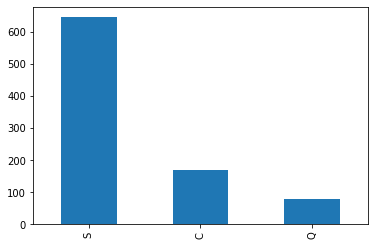

In [ ]:
# most embarked from southampton
e_count = data['Embarked'].value_counts()
e_count.plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7d1b25550>,
      dtype=object)

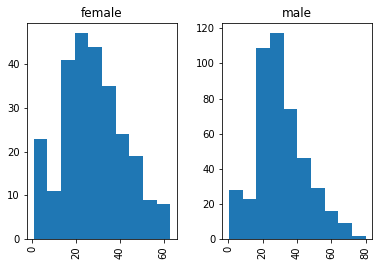

In [ ]:
#from pandas profiling age has a skewwed distribution 
#lets take a closer look esp between the sexes
data['Age'].hist(by=data['Sex'])

In [ ]:
#checking median age for each gender
data.groupby('Sex')['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [ ]:
#imputing age values based on median age for each gender
data['Age'] = data.groupby(['Sex'])['Age'].apply(lambda x: x.fillna(x.median()))


In [ ]:
#further checking if theres any other missing values:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
CabinGroup     0
dtype: int64

**summary of filling missing values**:


Cabin had too many missing values, but first letter gives us some information about the deck the passenger was on i.e A, B, C etc; created a new column 'cabingroup' and filled letter M for the missing values. This new column might give us more insights in EDA later.

Embarked had only two missing values, we filled in with the mode, as well as the mode after grouping the data to fit the other categories the passengers fell under.

Age was filled in with the median value based on the gender of the passenger

*Further analysis of other columns:*




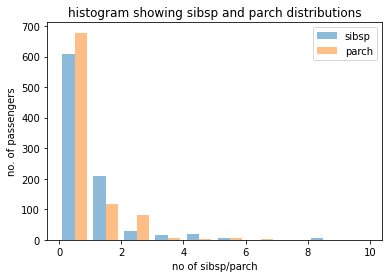

In [ ]:
#looking at sibsp and parch distributions together
#both are a count family/ relatives on board
#histogram for both
sibsp = data['SibSp']
parch = data['Parch']
plt.hist([sibsp,parch], bins= 10, range=[0,10], alpha=0.5, label=['sibsp', 'parch'])
plt.legend(loc='upper right')
plt.title('histogram showing sibsp and parch distributions')
plt.xlabel('no of sibsp/parch')
plt.ylabel('no. of passengers')
plt.show()

#both have a similar skewwed distribution

Text(0.5, 0, 'family size (including self)')

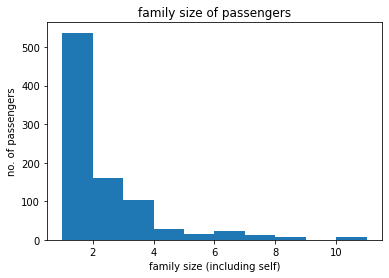

In [ ]:
#New column for family size merging the two
# +1 to include the individual 
data['Famsize'] = data['SibSp'] + data['Parch'] + 1

# family size distribtion
data['Famsize'].plot.hist()
plt.title('family size of passengers')
plt.ylabel('no. of passengers')
plt.xlabel('family size (including self)')


#a lot of small families compared to large families
# we will futher make bins and divide the classes into bins

In [ ]:
# will make new columns familysize with bins
# better way to deal with outlier without removing it

data['FamsizeB'] = " "
# filling bins based on values, will add a separate bin for zero values
data['FamsizeB'] = np.where((data['Famsize'] == 1), 'nofam', data['FamsizeB']) 
data['FamsizeB'] = np.where((data['Famsize'] > 1) & (data['Famsize'] < 6), 'small',
                             data['FamsizeB']) 
data['FamsizeB'] = np.where((data['Famsize'] >= 6), 'large', data['FamsizeB']) 

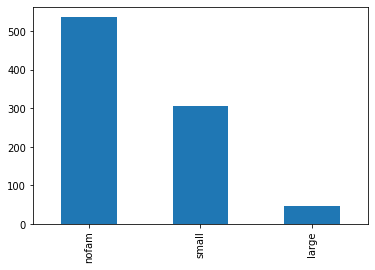

In [ ]:
#checking frequency distribution of travelmode
fb_count = data['FamsizeB'].value_counts()
fb_count.plot.bar()


In [ ]:
#nothing interesting about tickets other than that some shared same ticket
#exploring that fact:
#creating new df for tickets vs grouped by no of p_id using same ticket
sameticket = data.groupby('Ticket')['PassengerId'].nunique().reset_index()
sameticket.rename(columns={'PassengerId': 'p_count'}, inplace=True)
sameticket

Ticket  p_count
0         110152        3
1         110413        3
2         110465        2
3         110564        1
4         110813        1
..           ...      ...
676   W./C. 6608        4
677   W./C. 6609        1
678  W.E.P. 5734        1
679    W/C 14208        1
680    WE/P 5735        2

[681 rows x 2 columns]

In [ ]:
# merging the sameticket df with our data 

data = pd.merge(data, sameticket, on="Ticket", how="left")


In [ ]:
#will create new column for travelmode 
data["TravelMode"] = " "
#to consist of following classes:
#alone - individual travelled alone
#withFam - travelled with family
#withOther - travelled with non family members
#withBoth - travelled with non family and family


data['TravelMode'] = np.where((data['Famsize'] == 1 ) & (data['p_count'] == 1 ),
                              'alone', data['TravelMode'])
data['TravelMode'] = np.where((data['Famsize'] > 1 ) & (data['p_count'] == 1 ),
                              'withFamily', data['TravelMode'])
data['TravelMode'] = np.where((data['Famsize'] == 1 ) & (data['p_count'] > 1 ),
                              'withOthers', data['TravelMode'])
data['TravelMode'] = np.where((data['Famsize'] > 1 ) & (data['p_count'] > 1 ), 
                              'withBoth', data['TravelMode'])


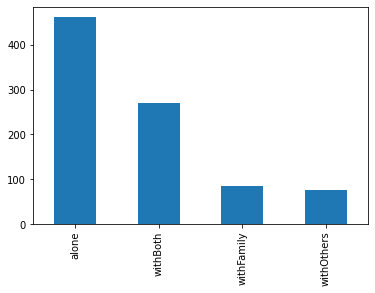

In [ ]:
#checking frequency distribution of travelmode
tm_count = data['TravelMode'].value_counts()
tm_count.plot.bar()

#about half the passengers were travelling alone
#will explore further later

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


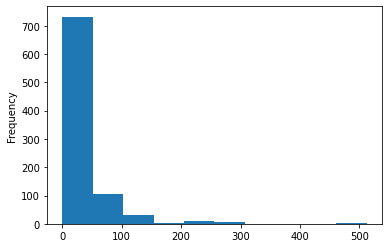

In [ ]:
#looking at fare column:
print(data['Fare'].describe())
data['Fare'].plot.hist()

# fare is heavily skewed, there seems to be outliers as well.
# a handful of people paied zero fare
# looks like three distinct groups: >0, >50, >100

In [ ]:

data.groupby(['Pclass'])['Fare'].describe()
# checking price range by pclass, there is a bit of an overlap between the classes
# but prices generally go higher each class

count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

In [ ]:
# will make new columns faregroups with bins
# making zero as its own class to further explore later
data['FareGroup'] = " "
# filling bins based on values, will add a separate bin for zero values
data['FareGroup'] = np.where((data['Fare'] == 0), 'zero', data['FareGroup']) 
data['FareGroup'] = np.where((data['Fare'] > 0) & (data['Fare'] < 50), '1-49',
                             data['FareGroup']) 
data['FareGroup'] = np.where((data['Fare'] >= 50) & (data['Fare'] < 100), 
                             '50-99', data['FareGroup']) 
data['FareGroup'] = np.where((data['Fare'] >= 100), '100+', data['FareGroup']) 

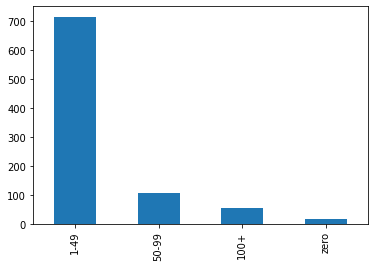

In [ ]:
#bar graph for the faregroup
#most passengers paid between less than 50usd (1912)
fg_count = data['FareGroup'].value_counts()
fg_count.plot.bar()

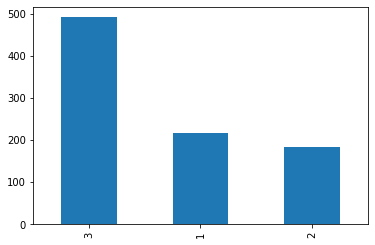

In [ ]:
#pclass 
#there were three classes
pc_counts = data['Pclass'].value_counts()
pc_counts.plot.bar()

#more than half of passengers were in third class

count    891.000000
mean      29.441268
std       13.018747
min        0.420000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7d0e29bd0>,
      dtype=object)

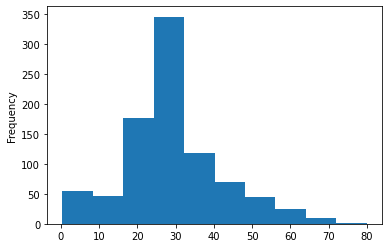

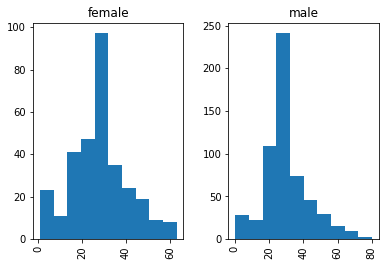

In [ ]:
#looking at the age column after imputing all missing values
print(data['Age'].describe())
data['Age'].plot.hist()

#
# histogram for age grouped by sex
data['Age'].hist(by=data['Sex'])

#more passengers aged 30 and below across sexes

In [ ]:
# will make new columns agegroups with bins
# 0-12 for children
# 13-19 teens
# 20-34 y adults
# 35-49 middle aged
# 50+ senior 


data['AgeGroup'] = " "
# filling bins based on values, will add a separate bin for zero values
data['AgeGroup'] = np.where((data['Age'] < 13), '0-12', data['AgeGroup']) 
data['AgeGroup'] = np.where((data['Age'] >= 13) & (data['Age'] < 20), '13-19',
                             data['AgeGroup']) 
data['AgeGroup'] = np.where((data['Age'] >= 20) & (data['Age'] < 35), 
                             '20-34', data['AgeGroup']) 
data['AgeGroup'] = np.where((data['Age'] >= 35) & (data['Age'] < 50), 
                             '35-49', data['AgeGroup'])
data['AgeGroup'] = np.where((data['Age'] >=50 ), '50+', data['AgeGroup']) 

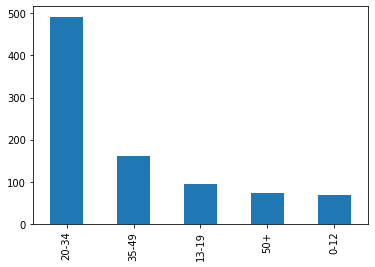

In [ ]:
#checking distribution of agegroup
ag_counts = data['AgeGroup'].value_counts()
ag_counts.plot.bar()

#more than half of passengers are between 20-34 (young adults category)

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'CabinGroup', 'Famsize',
       'FamsizeB', 'p_count', 'TravelMode', 'FareGroup', 'AgeGroup'],
      dtype='object')

In [ ]:
#changing to appropriate dtypes
convert_dict = { 'PassengerId': object , 'Survived': 'category' ,
                'Pclass': 'category', 'Name': object , 'Age': float,
                'Sex': 'category', 'SibSp': int , 'Parch': int,
                'Ticket': object , 'Fare': float , 'Cabin': object, 
                'Embarked': 'category', 'CabinGroup': 'category',
                'Famsize': int , 'p_count': int , 'TravelMode': 'category',
                'FareGroup': 'category', 'AgeGroup': 'category',
                'FamsizeB': 'category', 
               }
  
data = data.astype(convert_dict)

In [ ]:
#new df dropping columns we do not need at this point:
ndata = data.drop(['PassengerId','Name', 'SibSp','Parch','Ticket',
                   'Fare','Cabin','p_count', 'Age', 'Famsize' ],axis=1)

In [ ]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    category
 1   Pclass      891 non-null    category
 2   Sex         891 non-null    category
 3   Embarked    891 non-null    category
 4   CabinGroup  891 non-null    category
 5   FamsizeB    891 non-null    category
 6   TravelMode  891 non-null    category
 7   FareGroup   891 non-null    category
 8   AgeGroup    891 non-null    category
dtypes: category(9)
memory usage: 16.4 KB


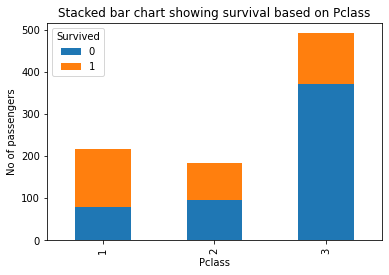

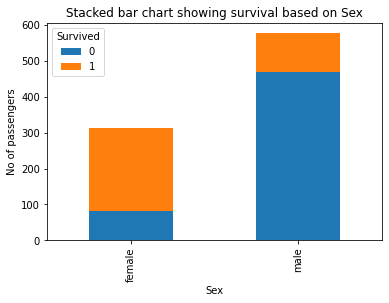

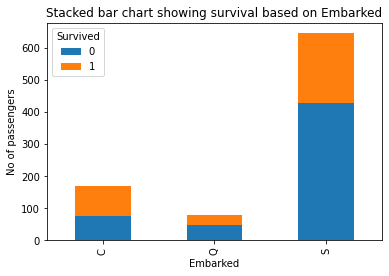

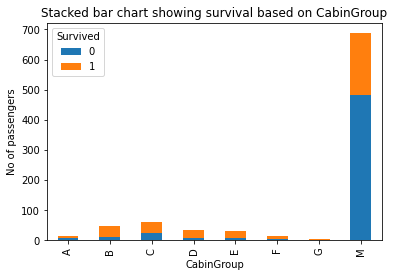

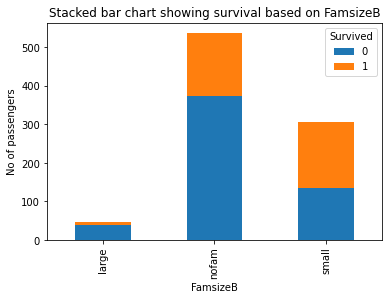

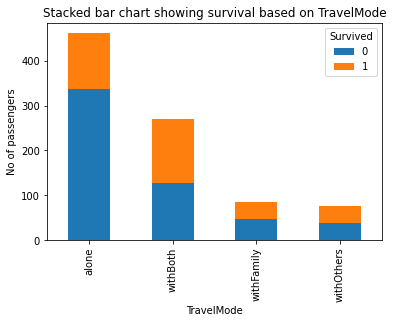

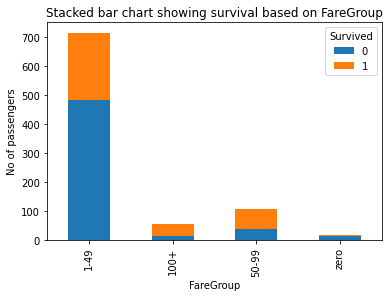

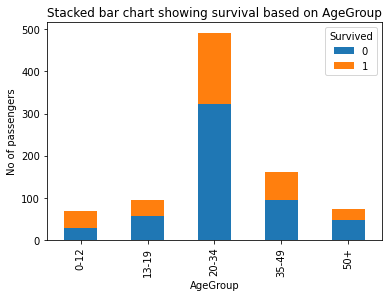

In [ ]:
#bivariate analysis
#overview

ndatafac = ['Pclass','Sex','Embarked','CabinGroup', 'FamsizeB','TravelMode',
            'FareGroup', 'AgeGroup']
for f in ndatafac:
  pd.crosstab(ndata[f], data['Survived']).plot(kind='bar', stacked=True)
  plt.title("Stacked bar chart showing survival based on " + f)
  plt.ylabel("No of passengers")
  plt.show()

**Summary of survived against factors:**


*pclass* - about half from second class and more than half of first class survived, while too many of passengers from third class did not make it out alive. 

*Sex* - larger proportion of female passengers survived compared to the male passengers

*Embarked* - overall more passengers who embarked from southamption survived, but proportionally more passengers embarking from Cherbourg survived compared to the two

*CabinGroup*- from general info sites, the first letter represents the deck the cabin was on, starting from higher deck going down from A , B, C, etc upto G. The higher decks were also reserved for first class which could be a factor to increase chances of survival. However most of the data had missing values and were filed with M for missing. A huge number of those classified under M did not survive, and it is possible they could have been in the lower decks, as from previous pclass analysis a lot of passengers were in third class.

*FamsizeB*- Those with larger families (people more than 6) had lower survival rates followed by those without any family onboard. Those with small families had higher survival

*TravelMode-* Similarly we can see those that were alone had low survival rates compared to those who did not come alone, family or others.

*FareGroup*- Proportionally the survival rate reduced as we go down the faregroups from most surviving in the 100+ group to barely anyone surviving in the zero group.

*AgeGroup*- More survived in the child category 0-12 compared to the other groups.

In [ ]:
! pip install association-metrics


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for association-metrics: filename=association_metrics-0.0.1-py3-none-any.whl size=3954 sha256=63c2f469b09c89aac6565f1b79a78d5b461d358f3907ef97a3c773c880c8aa24
  Stored in directory: /root/.cache/pip/wheels/2d/1e/07/287b993a07cc41eade32a9b863d6d4686f985d72344a9e0911
Successfully built association-metrics


In [ ]:
# Import association_metrics  
import association_metrics as am

# using cramers for checking correlation in categorical variables
cramersv = am.CramersV(ndata) 
# will return a pairwise matrix filled with Cramer's V, where columns and index are 
# the categorical variables of our df
cramersv.fit()

Survived    Pclass       Sex  Embarked  CabinGroup  FamsizeB  \
Survived    1.000000  0.339817  0.543351  0.170707    0.332970  0.272182   
Pclass      0.339817  1.000000  0.138013  0.262340    0.602830  0.176481   
Sex         0.543351  0.138013  1.000000  0.120404    0.204350  0.306747   
Embarked    0.170707  0.262340  0.120404  1.000000    0.201031  0.135601   
CabinGroup  0.332970  0.602830  0.204350  0.201031    1.000000  0.177968   
FamsizeB    0.272182  0.176481  0.306747  0.135601    0.177968  1.000000   
TravelMode  0.245458  0.170817  0.329791  0.137087    0.182814  0.721173   
FareGroup   0.293405  0.495537  0.213069  0.203031    0.411410  0.223695   
AgeGroup    0.132693  0.268612  0.111930  0.108043    0.184286  0.317472   

            TravelMode  FareGroup  AgeGroup  
Survived      0.245458   0.293405  0.132693  
Pclass        0.170817   0.495537  0.268612  
Sex           0.329791   0.213069  0.111930  
Embarked      0.137087   0.203031  0.108043  
CabinGroup    0.182814   0.411410  0.184286  
FamsizeB      0.721173   0.223695  0.317472  
TravelMode    1.000000   0.311750  0.233508  
FareGroup     0.311750   1.000000  0.133179  
AgeGroup      0.233508   0.133179  1.000000

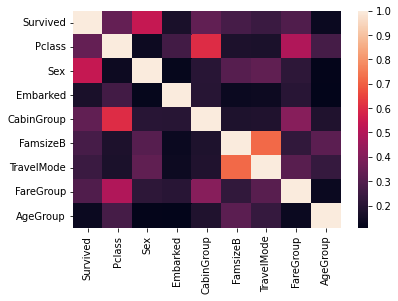

In [ ]:
#heatmap of the above results
#for visualisation
dataplot= sns.heatmap(cramersv.fit())
plt.show()

**summary from heatmap/CramersV:**

There is a high correlation between cabingroup and pclass (0.6), this is probably because the decks were assigned based on the class as we found out earlier. another to note is between faregroup and pclass (0.495), in the same way fare was dependent on the pclass.
- we can decide to drop both cabingroup and faregroup for pclass in our model

FamsizeB and TravelMode have a very high correlation (0.72), they can both be a measure of whether one had company onboard.
- will have to drop one of the two

Sex is also highly correlated to survived (0.54) which is also our target variable.



# *We are now ready to build our base model for classification !*